# **SIT 215 - Project**

# **Investigating Reinforcement Learning**

## Taxi Problem - Q-Learning Agent

### Mir Muhammad Sohaib 
### 220576368

# 1. Dependencies

## 1.1. Installing dependencies

In [1]:
# For using Open AI Gym
!pip install gym 

# For visualising Open AI Gym
!pip install pygame     

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 21.8 MB 1.6 MB/s 


## 1.2. Importing relevant libraries

In [2]:
# Importing relevant libraries 
import gym 
from random import random, uniform 
import math  
import numpy as np                                 
from random import random 
import matplotlib                          
import matplotlib.pyplot as plt

# 2. Q-Learning Agent

In [3]:
class Qlearner():
    def __init__(self, parameters):
        self.alpha = parameters['alpha']
        self.gamma = parameters['gamma']
        self.epsilon = parameters['epsilon']
        super().__init__()

    def initialize_taxi_q_table(self, env):
        self.q_table = np.zeros([env.observation_space.n, env.action_space.n])

    def taxi_training_action(self, env, observation):
        self.previous_observation = observation
        if random() < self.epsilon:
            # Explore
            return env.action_space.sample() 
        else:
            # Exploit
            return np.argmax(self.q_table[observation]) 

    def taxi_evaluation_action(self, observation):
        return np.argmax(self.q_table[observation])

    # Updates the previous observation qtable entry with the reward gained, using the best future option
    def taxi_update(self, observation, action, reward):
        old_value = self.q_table[self.previous_observation, action]
        next_max = np.max(self.q_table[observation])
        new_value = (1 - self.alpha) * old_value + self.alpha * (reward + self.gamma * next_max)
        self.q_table[self.previous_observation, action] = new_value

# 3. Driver Class (Helper Methods)

In [4]:
class Driver:
    # Initialise
    def __init__(self, params):
        self.epochs = params['epochs']
        self.env = params['env']
        self.agent = params['agent']
        self.training_rewards = []
        self.evaluation_rewards = []

    # Run Q-Learner
    def run_taxi_qlearner(self):
        self.agent.initialize_taxi_q_table(self.env)

        training_action = lambda observation: self.agent.taxi_training_action(self.env, observation)
        update = lambda observation, action, reward: self.agent.taxi_update(observation, action, reward)
        evaluation_action = lambda observation: self.agent.taxi_evaluation_action(observation)

        self.run(training_action, update, evaluation_action)
        
    # Training and evaluation loop, plots then demonstrate
    def run(self, training_action, update, evaluation_action):
        for i in range(self.epochs):
            if ((i + 1) % 1000 == 0):
                print("Progress: {}%".format(100 * (i + 1) // self.epochs))
            self.train_once(training_action, update)
            self.evaluate_once(evaluation_action)

        self.plot()
        
        try:
            self.demonstrate(evaluation_action)
        except NotImplementedError:
            print("Cannot demonstrate: render method on env not implemented.")

    # A single instance of training of the agent in the environment
    def train_once(self, training_action, update):
        observation = self.env.reset()
        done = False
        episode_reward = 0
        while not done:
            action = training_action(observation)
            observation, reward, done, info = self.env.step(action)
            episode_reward += reward
            update(observation, action, reward)
        self.training_rewards.append(episode_reward)

    # A single instance of evaluation of the agent at it's current level of training
    def evaluate_once(self, evaluation_action):
        observation = self.env.reset()
        done = False
        episode_reward = 0
        while not done:
            action = evaluation_action(observation)
            observation, reward, done, info = self.env.step(action)
            episode_reward += reward
        self.evaluation_rewards.append(episode_reward)

    # Plot the training and evaluation reward levels at each epoch
    def plot(self):
        plt.subplot('211')
        plt.plot(self.training_rewards, linewidth=1)
        plt.title('Training reward over time')
        plt.ylabel('Reward')
        plt.xlabel('Iterations')

        plt.subplot('212')
        plt.plot(self.evaluation_rewards, linewidth=1)
        plt.title('Evaluation reward over time')
        plt.ylabel('Reward')
        plt.xlabel('Iterations')
        plt.tight_layout()
        plt.show()
        
    # Use the environments render method and print some additional info to the console. permit user input for repeated demonstrations in a loop
    def demonstrate(self, evaluation_action):
            observation = self.env.reset()
            done = False
            episode_reward = 0
            reward = 0
            step = 0
            while not done:
                print(f"Step: {step} | Cumulative Reward: {episode_reward}")
                step += 1
                print("RENDERING:")
                self.env.render()
                action = evaluation_action(observation)
                print('Observation: ', observation)
                print('Action: ', action)
                print('Reward: ', reward)
                observation, reward, done, info = self.env.step(action)
                episode_reward += reward

# 4. Results

Progress: 10%
Progress: 20%
Progress: 30%
Progress: 40%
Progress: 50%
Progress: 60%
Progress: 70%
Progress: 80%
Progress: 90%
Progress: 100%


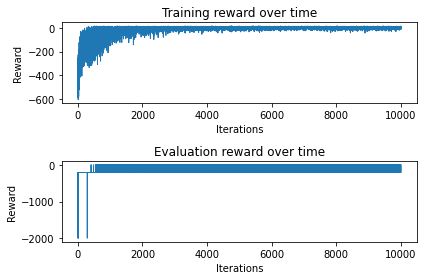

Step: 0 | Cumulative Reward: 0
RENDERING:
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

Observation:  309
Action:  0
Reward:  0
Step: 1 | Cumulative Reward: -1
RENDERING:
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
Observation:  409
Action:  4
Reward:  -1
Step: 2 | Cumulative Reward: -2
RENDERING:
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
Observation:  417
Action:  1
Reward:  -1
Step: 3 | Cumulative Reward: -3
RENDERING:
+---------+
|R: | : :G|
| : | : : |
| : : : : |
|_| : | : |
|Y| : |B: |
+---------+
  (North)
Observation:  317
Action:  1
Reward:  -1
Step: 4 | Cumulative Reward: -4
RENDERING:
+---------+
|R: | : :G|
| : | : : |
|_: : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
Observation:  217
Action:  2
Reward:  -1
Step: 5 | Cumulative Reward: -5
RENDERING:
+---------+
|R: | : :G|
| : | : : |
| :_: : : |
| | : | : |
|Y| : |B: |
+----

In [5]:
# Providing parameter values to the agent and driver
def taxi_qlearner():
    agent = Qlearner({
        'alpha': 0.1,
        'gamma': 0.6,
        'epsilon': 0.1,
    })
    driver = Driver({
        'epochs': 10000,
        'env': gym.make('Taxi-v3'),
        'agent': agent,
    })
    driver.run_taxi_qlearner()


if __name__ == '__main__':
    taxi_qlearner()